# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic_numerical=titanic.select_dtypes(include=['float64','int64'])
titanic_numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [5]:
#your code here- categorical variable
titanic_categorical=titanic.select_dtypes(include=['category'])
titanic_categorical

""
0
1
2
3
4
...
1304
1305
1306
1307


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
#set a figure
fig = plt.figure(figsize=(12,6))


<Figure size 864x432 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

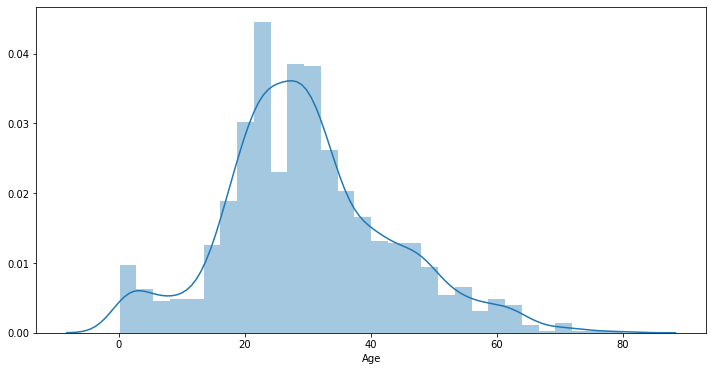

In [7]:
# your code here
fig = plt.figure(figsize=(12,6))
sns.distplot(titanic.Age)
#Se comporta como una normal 


#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

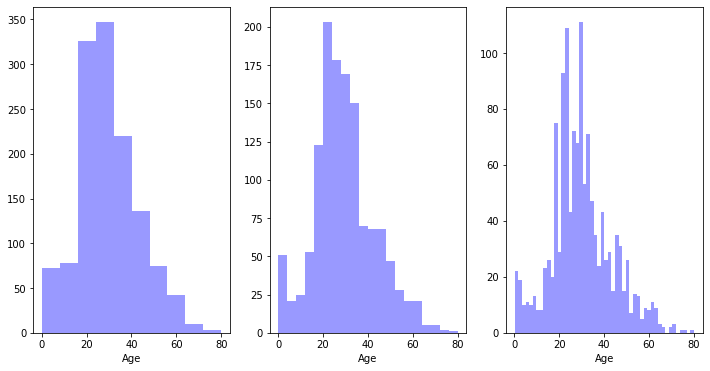

In [8]:
# your code here
f, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True)

sns.distplot(titanic.Age, kde=False, color="b", ax=axes[0],bins=10)
sns.distplot(titanic.Age, kde=False, color="b", ax=axes[1],bins=20)
sns.distplot(titanic.Age, kde=False, color="b", ax=axes[2],bins=50)
    

#### Whether the bin size affects your plot? Why?

In [9]:
#your comment here
#Afecta lo ancho los rectangulos

#### Use seaborn to show the distribution of the column `Age`

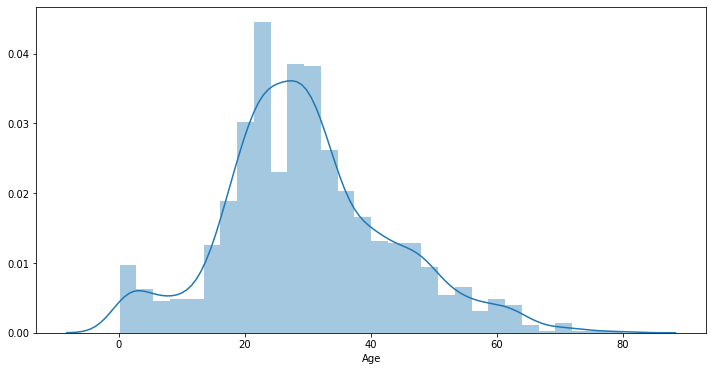

In [10]:
# your code here
fig = plt.figure(figsize=(12,6))
sns.distplot(titanic.Age)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

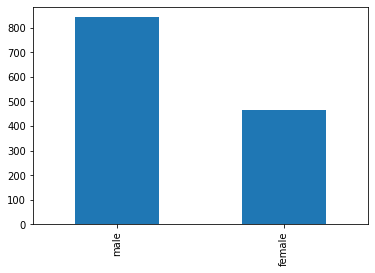

In [11]:
# your code here- 1st way
titanic.Gender.value_counts().plot.bar()

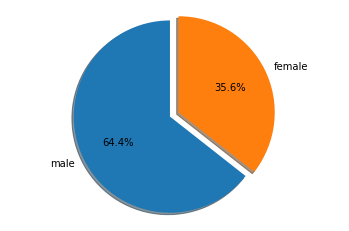

In [12]:
# your code here- 2nd way
explode = (0, 0.1)
labels=['male','female']
titanic.Gender.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(titanic.Gender.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#### Use the appropriate plot to visualize the column `Pclass` 


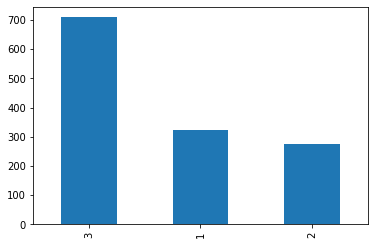

In [13]:
# your code here
titanic.Pclass.value_counts().plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

0    24.0
dtype: float64


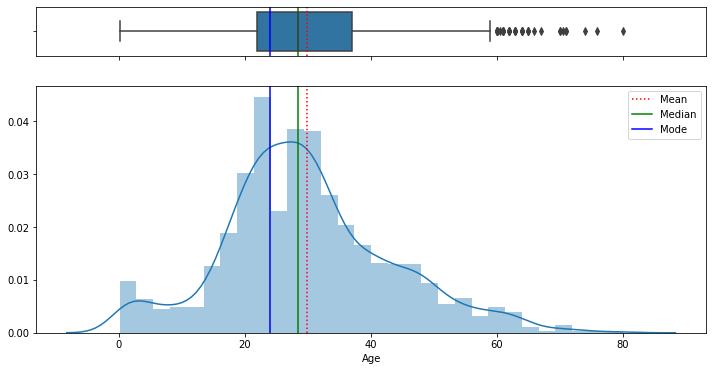

In [14]:
# your code here
x=titanic.Age
print(x.mode())
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(12,6),sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(x, ax=ax_box)
ax_box.axvline(x.mean(), color='r', linestyle=':')
ax_box.axvline(x.median(), color='g', linestyle='-')
ax_box.axvline(float(x.mode()), color='b', linestyle='-')
sns.distplot(x, ax=ax_hist)
ax_hist.axvline(x.mean(), color='r', linestyle=':')
ax_hist.axvline(x.median(), color='g', linestyle='-')
ax_hist.axvline(float(x.mode()), color='b', linestyle='-')
plt.legend({'Mean':x.mean(),'Median':x.median(),'Mode':x.mode()})
ax_box.set(xlabel='')
plt.show()


#### What does the previous plot tell you about the feature `Age`? Comment.

In [15]:
# your comment here
#Es una distribución con un boxplot debido que podemos comparar su media, moda y mediana y describir mejor la distribución. 
#En el boxplot podemos darnos de los outliers que hace que la nuestra distrbución este sesgada a la izquiera o en todo caso
#tengamos una cola más alargada hacia la derecha


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [16]:
#your code here
#Se muestra arriba la distribución 


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [17]:
#your comment here
#La explicación se encuentra arriba


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

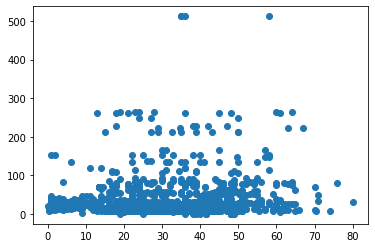

In [22]:
#your code-1st way

plt.scatter(titanic.Age,titanic.Fare,)

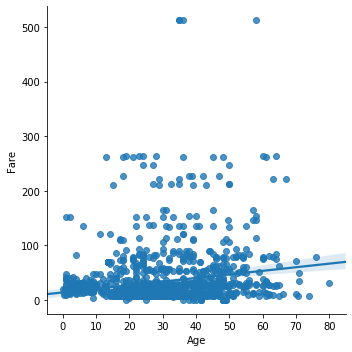

In [31]:
# your code-2nd way
data_corr=titanic[['Age','Fare']]
sns.lmplot(x='Age',y='Fare',data=data_corr)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

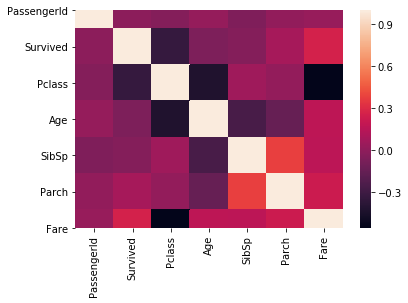

In [36]:
#your code here
corr=titanic.corr()
sns.heatmap(corr)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#hay una relación en SibSp con Parch, una relación de 0.6 positiva

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

[Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')]

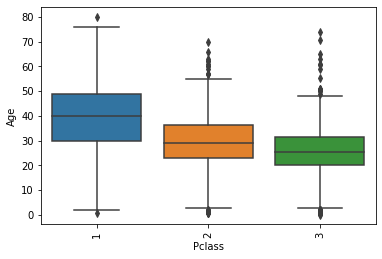

In [39]:
#your code here
data_box=titanic[['Age','Pclass']]
ax = sns.boxplot(x="Pclass", y="Age", data=data_box)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

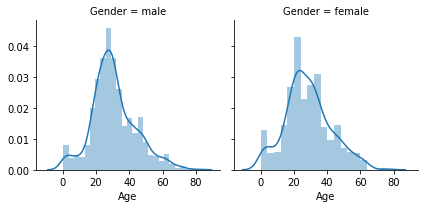

In [51]:
#your code here
data=titanic[['Age','Gender']]
data
g = sns.FacetGrid(data, col="Gender")
g = g.map(sns.distplot, "Age")
